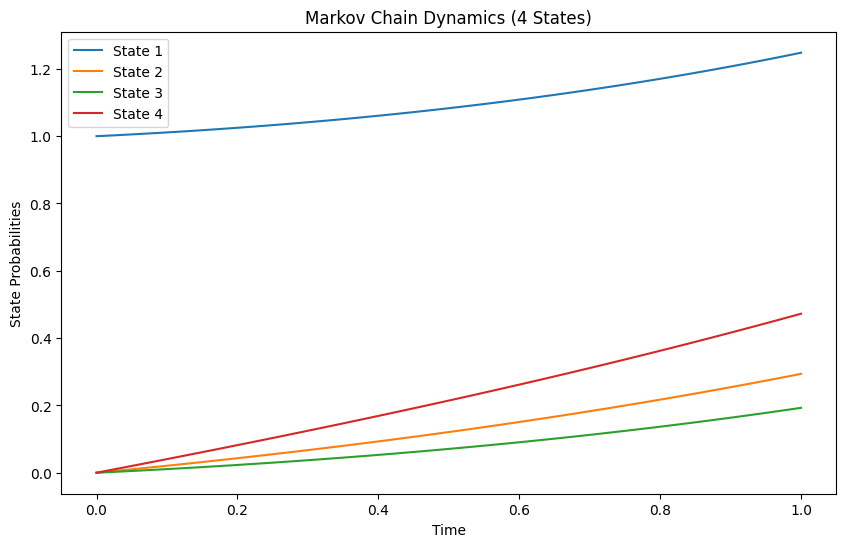

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

N = 4  # Number of states
T = 1  # Time horizon
A = np.array([[0.1, 0.2, 0.3, 0.4],
              [0.2, 0, 0.1, 0.3],
              [0.1, 0.3, 0, 0.2],
              [0.4, 0.2, 0.1, 0]])

epsilon = np.eye(N)

def markov_chain_dynamics(t, X):
    dXdt = A @ X
    return dXdt

X0 = np.array([1, 0, 0, 0])  # Initial state
t_points = np.linspace(0, T, 100)

solution = spi.solve_ivp(markov_chain_dynamics, (0, T), X0, t_eval=t_points)

plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(solution.t, solution.y[i], label=f'State {i+1}')

plt.title('Markov Chain Dynamics (4 States)')
plt.xlabel('Time')
plt.ylabel('State Probabilities')
plt.legend()
plt.show()


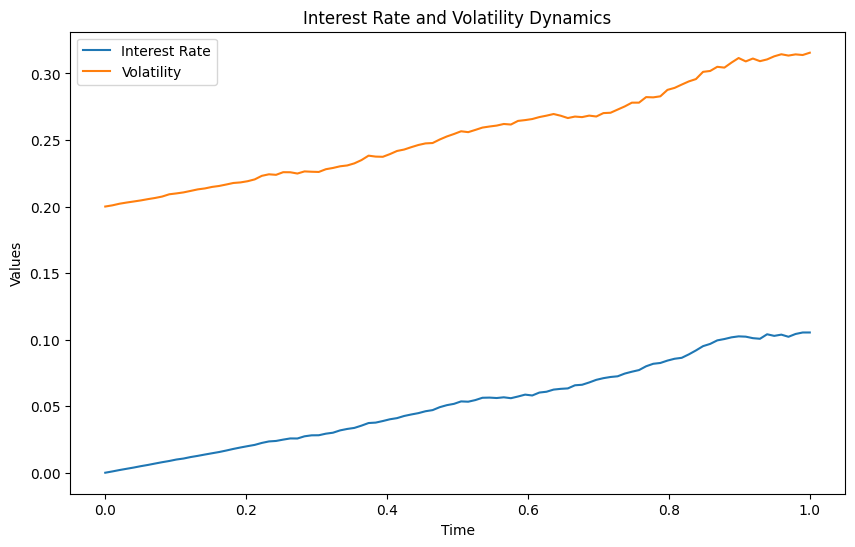

Correlation term (rho_rs): 0.5


In [2]:
T = 1  # Time horizon
mu = 0.1  # Constant drift for stock price
gamma1 = 0.2  # Volatility rate for interest rate
gamma2 = 0.3  # Volatility rate for stochastic volatility
rho_rs = 0.5  # Correlation coefficient between interest rate and volatility

def system_dynamics(t, Y):
    r, sigma = Y
    gamma = np.array([[gamma1, 0], [gamma2 * rho_rs, gamma2 * np.sqrt(1 - rho_rs**2)]])
    mu_vector = np.array([mu, mu])
    dB = np.random.normal(size=2) * np.sqrt(t)
    dYdt = mu_vector + np.dot(gamma, dB)
    return dYdt

Y0 = np.array([0, 0.2])  # Initial values for interest rate and volatility
t_points = np.linspace(0, T, 100)

solution = spi.solve_ivp(system_dynamics, (0, T), Y0, t_eval=t_points)

plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Interest Rate')
plt.plot(solution.t, solution.y[1], label='Volatility')
plt.title('Interest Rate and Volatility Dynamics')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()
print(f"Correlation term (rho_rs): {rho_rs}")


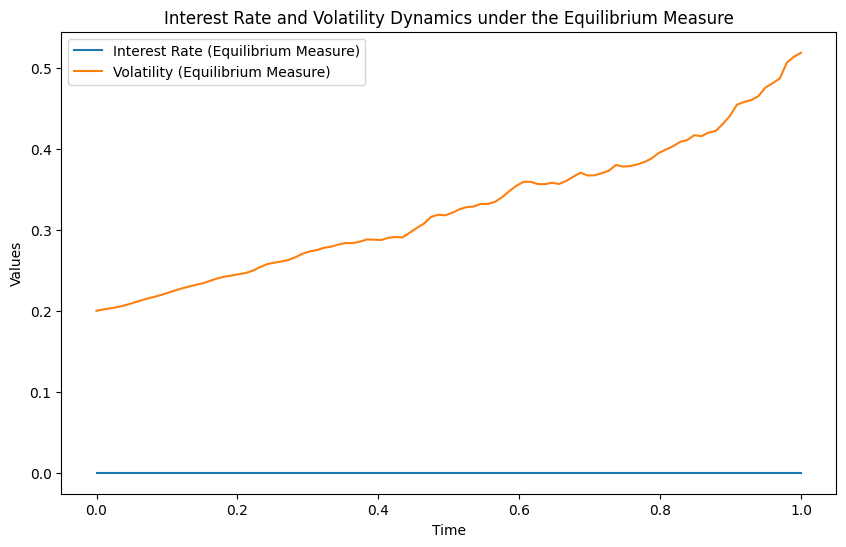

European Call Option Price under the Equilibrium Measure: 0.0


In [3]:
T = 1  # Time horizon
K = 100  # Strike price

def equilibrium_measure_dynamics(t, W_star):
    return W_star

def european_call_option_pricing(S_T, K):
    return np.maximum(S_T - K, 0)

def equilibrium_system_dynamics(t, Y):
    r, sigma = Y
    dW_star = np.random.normal() * np.sqrt(t)
    return np.array([r, sigma]) + np.array([0, sigma]) * dW_star

Y0_equilibrium = np.array([0, 0.2])  # Initial values for interest rate and volatility
t_points_equilibrium = np.linspace(0, T, 100)
solution_equilibrium = spi.solve_ivp(equilibrium_system_dynamics, (0, T), Y0_equilibrium, t_eval=t_points_equilibrium)
W_star_path = np.cumsum(np.random.normal(size=len(t_points_equilibrium)-1) * np.sqrt(np.diff(t_points_equilibrium)))
W_star_path = np.concatenate([[0], W_star_path])

plt.figure(figsize=(10, 6))
plt.plot(solution_equilibrium.t, solution_equilibrium.y[0], label='Interest Rate (Equilibrium Measure)')
plt.plot(solution_equilibrium.t, solution_equilibrium.y[1], label='Volatility (Equilibrium Measure)')
plt.title('Interest Rate and Volatility Dynamics under the Equilibrium Measure')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

S_T = np.exp(solution_equilibrium.y[0][-1])
call_option_price = european_call_option_pricing(S_T, K)
print(f"European Call Option Price under the Equilibrium Measure: {call_option_price}")


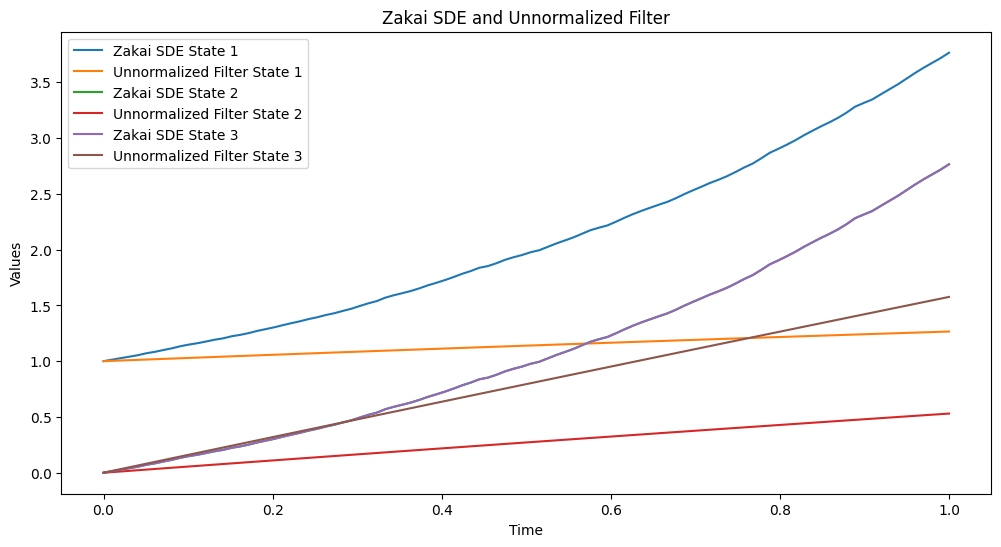

In [4]:
T = 1  # Time horizon
N_states = 3  # Number of hidden states

def zakai_sde(t, X, Y, gamma, mu, sigma, alpha, beta, delta):
    dY = np.random.normal(size=2) * np.sqrt(t)
    ds = np.dot(np.dot(np.linalg.inv(gamma), mu), X)
    diffusion_term = np.sum(sigma * np.random.normal(size=len(sigma)))
    return ds + diffusion_term + alpha * t + np.dot(beta, Y) + np.dot(delta, np.random.normal(size=len(delta)))

def unnormalized_filter_sde(t, X, Y, gamma, mu, sigma, alpha, beta, delta):
    dY = np.random.normal(size=2) * np.sqrt(t)
    return np.exp(-np.dot(np.linalg.inv(gamma), mu)) - 0.5 * np.dot(np.dot(np.linalg.inv(gamma), mu), mu) * t

# Initial conditions and parameters
X0 = np.array([1, 0, 0])  # Initial hidden state probabilities
Y0 = np.array([0, 0.2])  # Initial values for interest rate and volatility
gamma = np.array([[0.1, 0.2, 0.3], [0.2, 0, 0.1], [0.1, 0.3, 0]])  # Transition matrix
mu = np.array([0.1, 0.2, 0.3])  # State-dependent drift
sigma = np.array([0.1, 0.2, 0.3])  # State-dependent volatility
alpha = 0.1
beta = np.array([0.2, 0.3])
delta = np.array([0.1, 0.2, 0.3])
t_points = np.linspace(0, T, 100)

zakai_result = spi.solve_ivp(zakai_sde, (0, T), X0, args=(Y0, gamma, mu, sigma, alpha, beta, delta), t_eval=t_points)
unnormalized_filter_result = spi.solve_ivp(unnormalized_filter_sde, (0, T), X0, args=(Y0, gamma, mu, sigma, alpha, beta, delta), t_eval=t_points)

plt.figure(figsize=(12, 6))
for i in range(N_states):
    plt.plot(zakai_result.t, zakai_result.y[i], label=f'Zakai SDE State {i+1}')
    plt.plot(unnormalized_filter_result.t, unnormalized_filter_result.y[i], label=f'Unnormalized Filter State {i+1}')
plt.title('Zakai SDE and Unnormalized Filter')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


In [6]:
T = 1  # Time horizon
N_states = 3  # Number of hidden states

# Function for the SDE of Jij
def sde_Jij(t, X, Y, gamma, mu, A):
    dY = np.random.normal(size=len(X)) * np.sqrt(t)
    ds = A @ X
    mu_matrix = np.outer(mu, X)
    return mu_matrix @ dY + ds + np.linalg.inv(gamma) @ mu * dY

# Function for the SDE of Oi
def sde_Oi(t, X, Y, gamma, mu, A):
    dY = np.random.normal(size=len(X)) * np.sqrt(t)
    ds = A @ X
    mu_matrix = np.outer(mu, X)
    return mu_matrix @ np.ones(N_states) + ds + np.dot(np.linalg.inv(gamma), mu) * dY


# Function for the SDE of Tij
def sde_Tij(t, X, Y, gamma, mu, A):
    dY = np.random.normal(size=len(Y)) * np.sqrt(t)
    ds = np.dot(A, X)
    mu_matrix = np.outer(mu, X)
    return mu_matrix @ np.linalg.solve(gamma, dY) + ds

X0 = np.zeros(N_states) # Initial hidden state probabilities
gamma = np.eye(N_states)  # Assuming gamma is an identity matrix for simplicity
mu = np.ones(N_states)    # Example values for mu
A = np.random.rand(N_states, N_states)
t_points = np.linspace(0, T, 100)

solution_Jij = spi.solve_ivp(sde_Jij, (0, T), X0, args=(np.zeros(2), gamma, mu, A), t_eval=t_points)
solution_Oi = spi.solve_ivp(sde_Oi, (0, T), X0, args=(np.zeros(2), gamma, mu, A), t_eval=t_points)
solution_Tij = spi.solve_ivp(sde_Tij, (0, T), X0, args=(np.zeros(N_states), gamma, mu, A), t_eval=t_points)

Dimensions of solution_Jij: (3, 100)
Dimensions of solution_Oi: (3, 100)
Dimensions of solution_Tij: (3, 100)


IndexError: index 3 is out of bounds for axis 0 with size 3

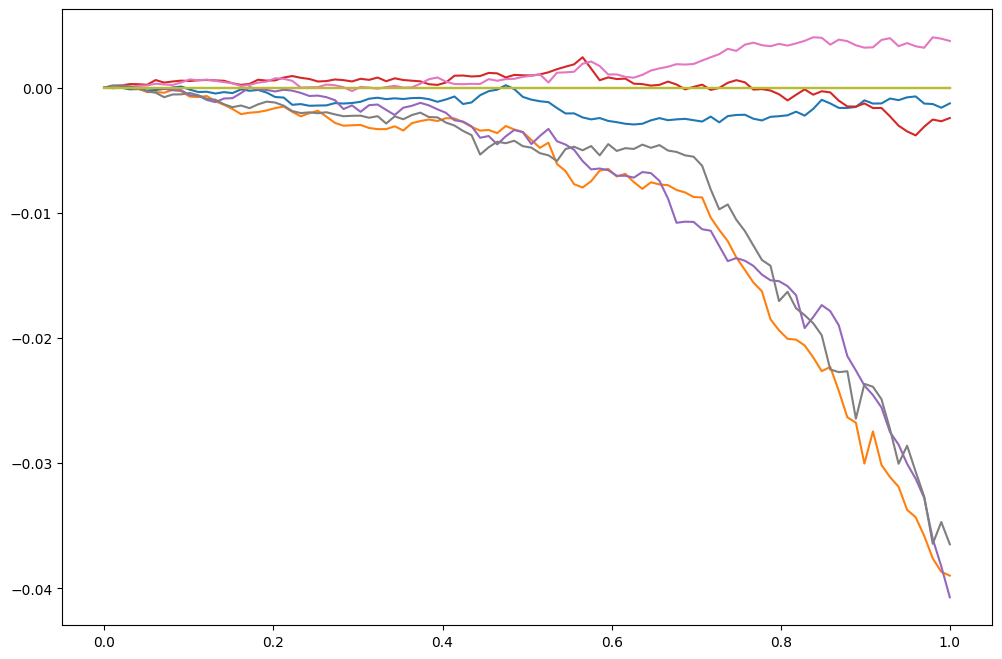

In [7]:
# Print the dimensions of solution arrays
print("Dimensions of solution_Jij:", solution_Jij.y.shape)
print("Dimensions of solution_Oi:", solution_Oi.y.shape)
print("Dimensions of solution_Tij:", solution_Tij.y.shape)

plt.figure(figsize=(12, 8))
for i in range(N_states):
    for j in range(N_states):
        idx = i * N_states + j
        plt.plot(solution_Jij.t, solution_Jij.y[idx, :], label=f'J{i+1}{j+1}')
        plt.plot(solution_Oi.t, solution_Oi.y[idx, :], label=f'O{i+1}{j+1}')
        plt.plot(solution_Tij.t, solution_Tij.y[idx, :], label=f'T{i+1}{j+1}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
